SCC5809 - Redes Neurais Artificiais e Aprendizado Profundo

**Nome**:  - **NUSP**: 

# Exercício 3

## Bibliotecas

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

## Carregando o dataset MNIST

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

## Explorando os dados

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Pré-processando os dados

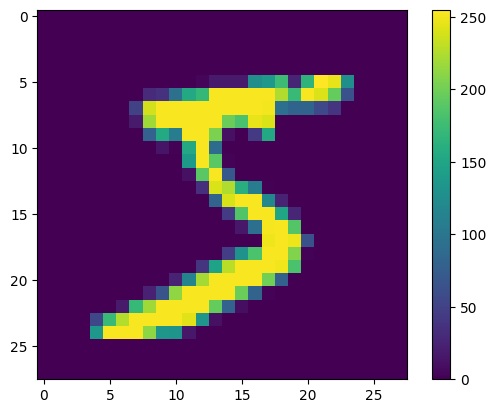

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

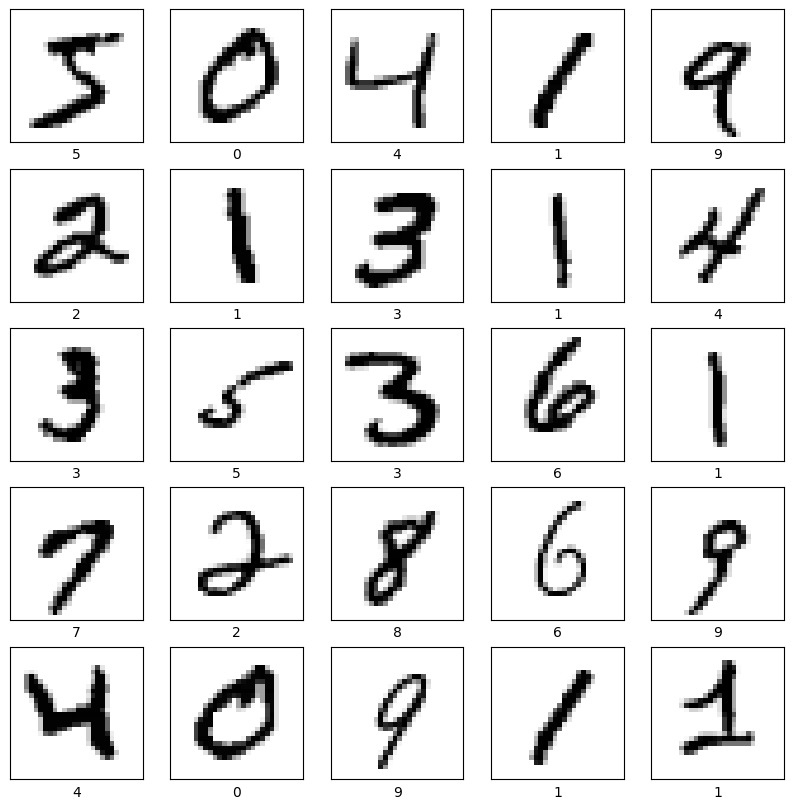

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

### Configurando os layers

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1),filters=32, kernel_size=(3, 3), strides=1, activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='valid'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=1, activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compilando o modelo

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 331,424 (1.26 MB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 220,950 (863.09 KB)

## Treinando o modelo

### Alimentando o modelo

In [15]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 24ms/step - accuracy: 0.7299 - loss: 0.7426
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9727 - loss: 0.0943
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9801 - loss: 0.0684
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.9828 - loss: 0.0594
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9848 - loss: 0.0527
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 25ms/step - accuracy: 0.9869 - loss: 0.0454
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9883 - loss: 0.0408
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9885 - loss: 0.0383
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9888 - loss: 0.0363
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9900 - loss: 0.0350


In [63]:
def plotTrainingLoss(loss, epochs):
  epochs_vec = [i for i in range(epochs)]
  plt.plot(epochs_vec, loss, label='Loss')
  plt.title('Loss over epochs')
  plt.show(True)
  return

In [62]:
def plotTrainingAccuracy(accuracy, epochs):
  epochs_vec = [i for i in range(epochs)]
  plt.plot(epochs_vec, accuracy, label='Accuracy')
  plt.title('Accuracy over epochs')
  plt.show(True)
  return

In [57]:
t_accuracy = list(history.history['accuracy'])
t_loss = list(history.history['loss'])

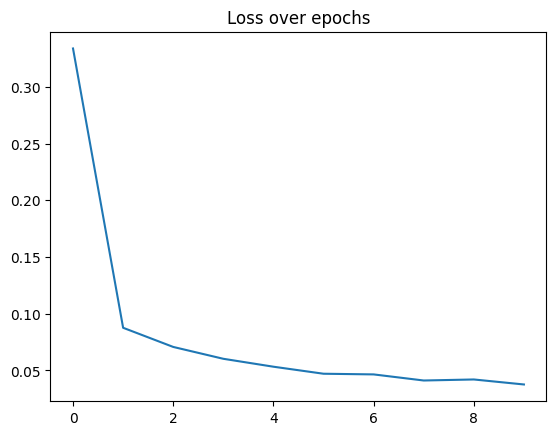

In [64]:
plotTrainingLoss(t_loss, epochs=10)

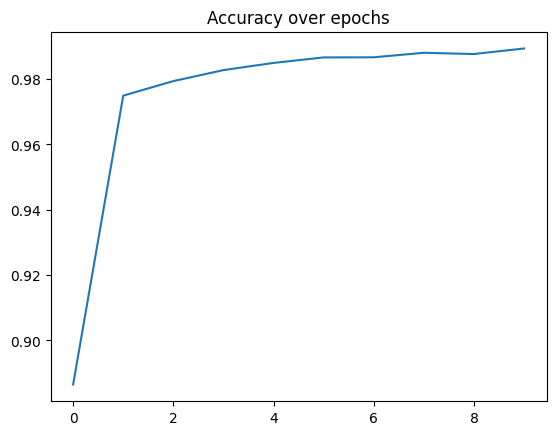

In [65]:
plotTrainingAccuracy(t_accuracy, epochs=10)

### Avaliando a acurácia

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nAccuracy on Test set:', test_acc)
print('\nLoss on Test set:', test_loss)

313/313 - 2s - 7ms/step - accuracy: 0.9835 - loss: 0.0849

Accuracy on Test set: 0.9835000038146973

Loss on Test set: 0.08486153930425644


### Realizando predições

In [30]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [31]:
predictions[0]

array([1.7012108e-25, 6.3246922e-11, 9.3082638e-13, 2.0286280e-14,
       1.2186093e-18, 3.3803788e-21, 4.8003648e-36, 9.9999994e-01,
       1.9195957e-23, 1.3813371e-14], dtype=float32)

In [32]:
np.argmax(predictions[0])

7

In [33]:
test_labels[0]

7

In [34]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verificando as predições

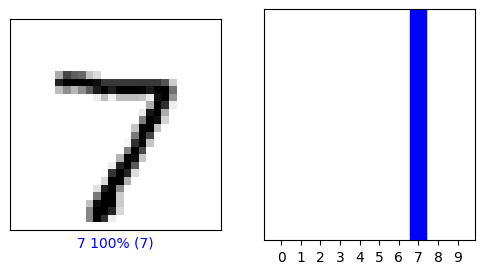

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

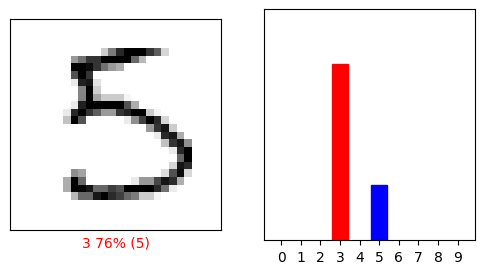

In [36]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

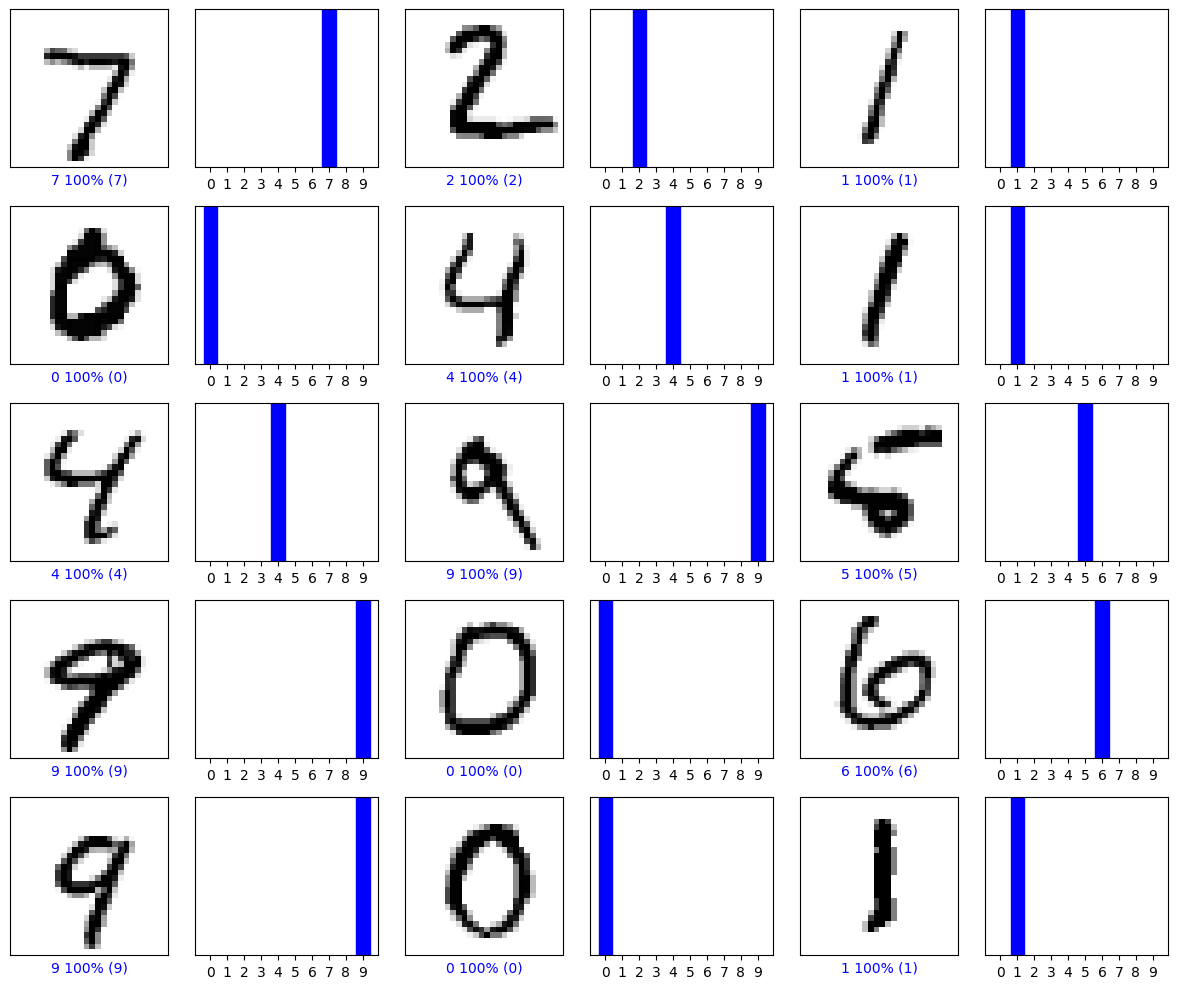

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Criando novas instâncias

In [38]:
from PIL import Image

def createCustomImagesBatch(image_names):
  np.zeros(shape=(1, 28, 28, 1))
  batches = []
  for i, image in enumerate(image_names):
    img = np.array(Image.open(image).convert('L'))
    img = 255 - img

    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

    print(img.shape)
    # Dimensoes de batch e canal
    img = tf.cast(img, tf.float32) / 255.0
    print(img.shape)
    batches.append(img)
  batches = np.array(batches)
  print(batches.shape)
  return batches

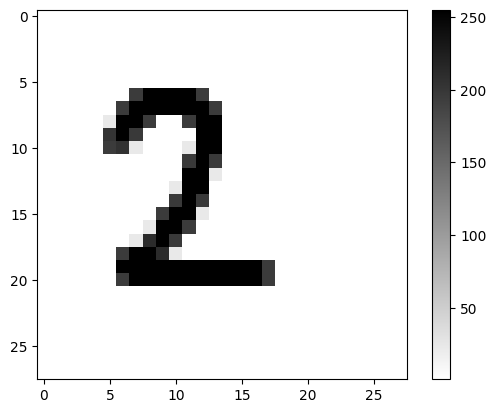

(28, 28)
(28, 28)


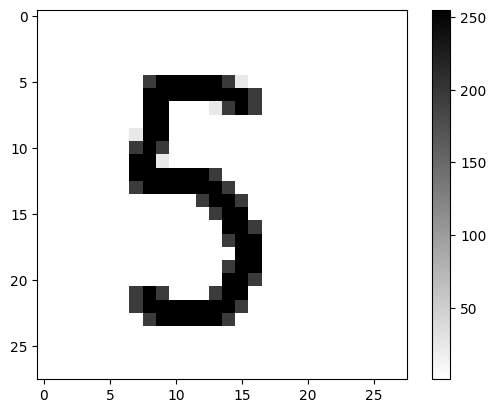

(28, 28)
(28, 28)


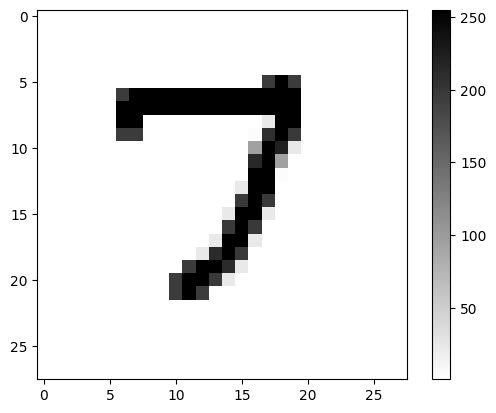

(28, 28)
(28, 28)


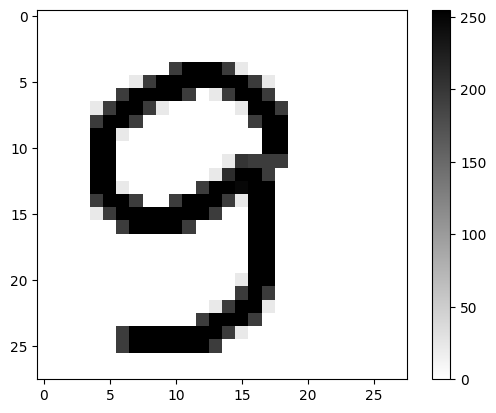

(28, 28)
(28, 28)
(4, 28, 28)


In [39]:
image_names = ['custom2.png', 'custom5.png', 'custom7.png', 'custom9.png']
custom_labels = [2, 5, 7, 9]
custom_inputs = createCustomImagesBatch(image_names)

In [40]:
# predicting
custom_predictions = model.predict(custom_inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


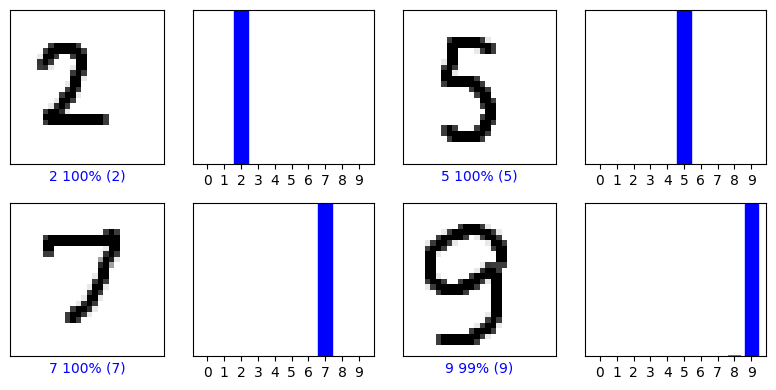

In [41]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 2
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, custom_predictions[i], custom_labels, custom_inputs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, custom_predictions[i], custom_labels)
plt.tight_layout()
plt.show()